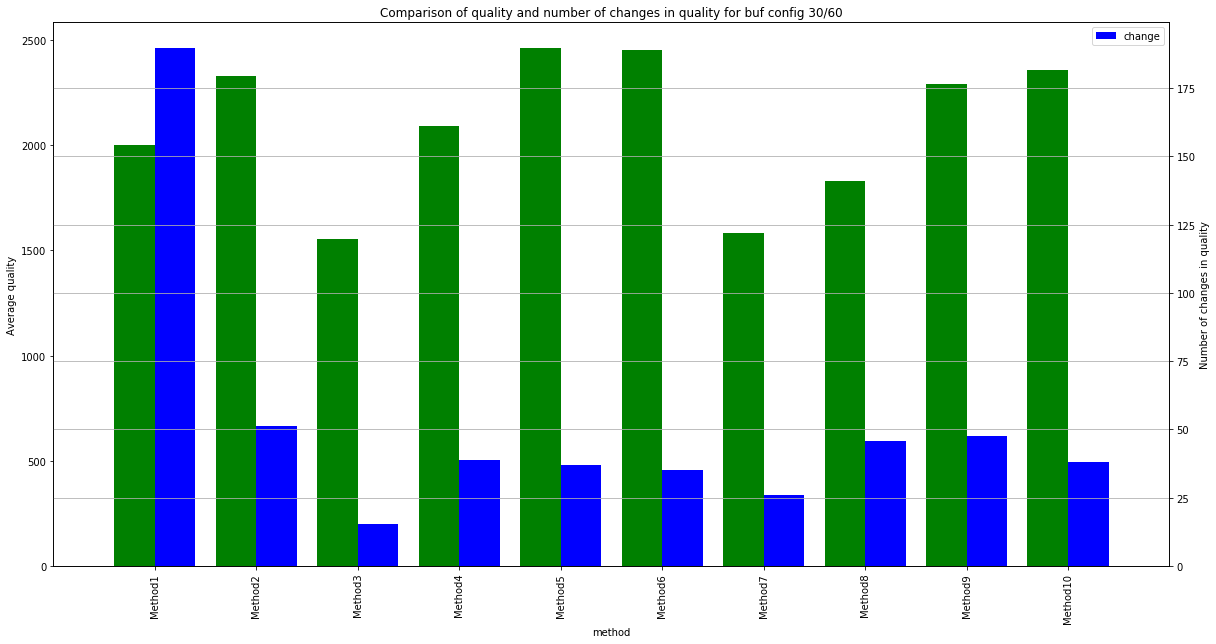

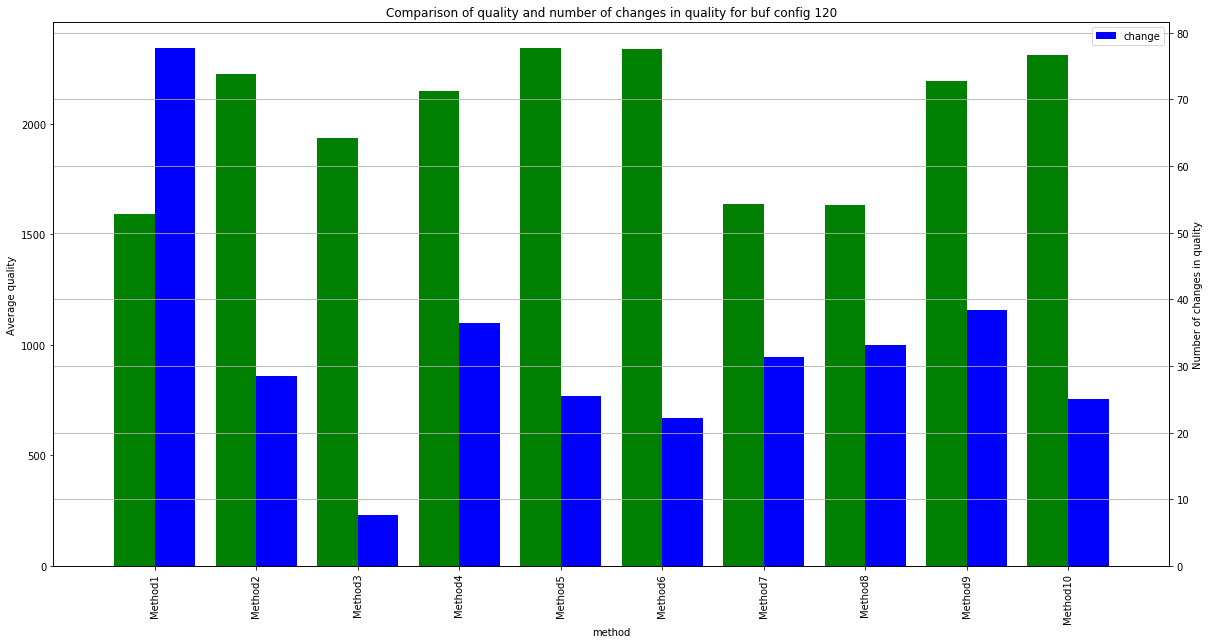

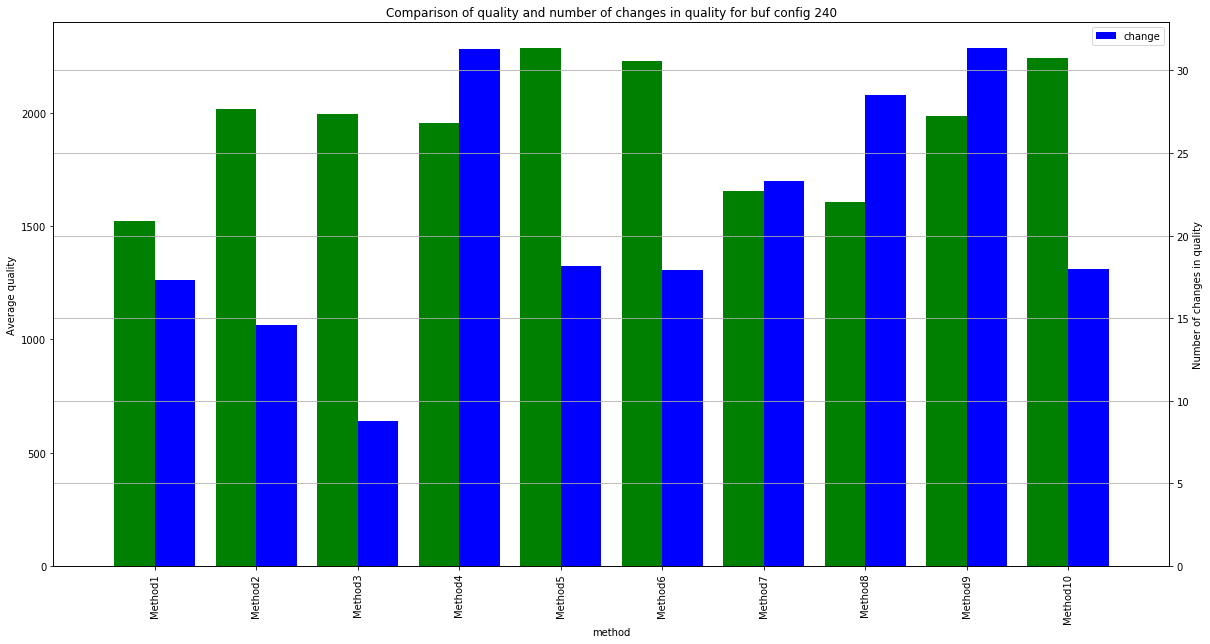

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py

BUFFER_CONFIGS = ['30/60','120','240']
METHODS = ['Method1', 'Method2', 'Method3', 'Method4', 'Method5', 'Method6', 'Method7', 'Method8', 'Method9', 'Method10']
PROFILES = ['p1', 'p2', 'p3', 'p4']
results = pd.read_csv('results.csv', skipinitialspace=True)

def plotConfig(result, config):
    resultByMethod = result.groupby(['method'])['quality','change'].mean() #aggregation by methods
    resultByMethod = resultByMethod.reindex(METHODS) # reorder rows
    fig = plt.figure()
    fig.set_size_inches(20, 10) # set size of the plot
    ax = fig.add_subplot(111)
    ax2= ax.twinx()
    
    width = 0.4
    
    resultByMethod.quality.plot(kind = 'bar', color = 'green', ax=ax, width=width, position=1)
    resultByMethod.change.plot(kind = 'bar', color = 'blue', ax=ax2, width=width, position=0)
    
    ax.set_ylabel('Average quality')
    ax2.set_ylabel('Number of changes in quality')
    plt.title('Comparison of quality and number of changes in quality for buf config '+config)
    plt.grid()
    plt.xlim([-1,10])
    plt.legend()  
    plt.show()
    
#For Q1
for config in BUFFER_CONFIGS:
    result = results[results.bufSize == config] #filter by buf config
    result = result[['method','quality','change']] #remove unnecessary columns
    plotConfig(result, config)

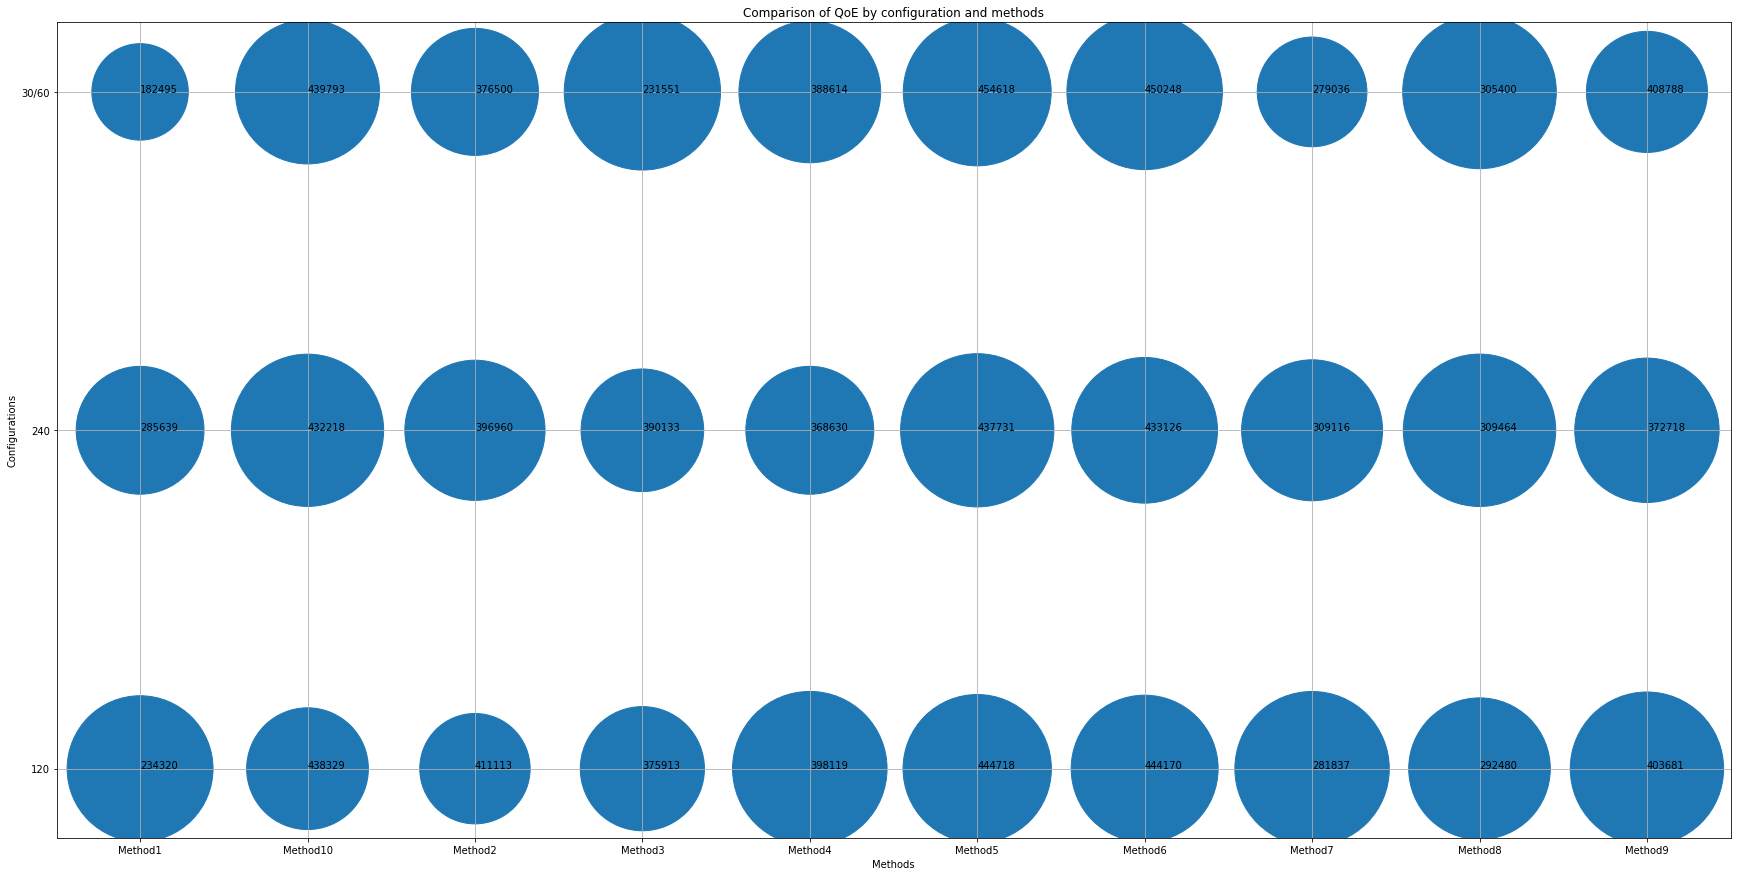

In [38]:
#For Q2
results2 = results[['method','bufSize','qoe']] #remove unnecessary colu
data=results2.groupby(['method', 'bufSize'])['qoe'].mean().unstack(level=-1).reindex(index=METHODS, columns=BUFFER_CONFIGS)
x = METHODS*3
y = BUFFER_CONFIGS*10
size = (data.values.flatten()-15000)/18
plt.figure(figsize=(30,15))
plt.grid()
plt.xlabel('Methods')
plt.ylabel('Configurations')
plt.title('Comparison of QoE by configuration and methods')
plt.scatter(x,y,s=size)
for i in range(10):
    for j in range(3):
        plt.annotate(int(data.values[i][j]),xy=(METHODS[i],BUFFER_CONFIGS[j]))
plt.show()




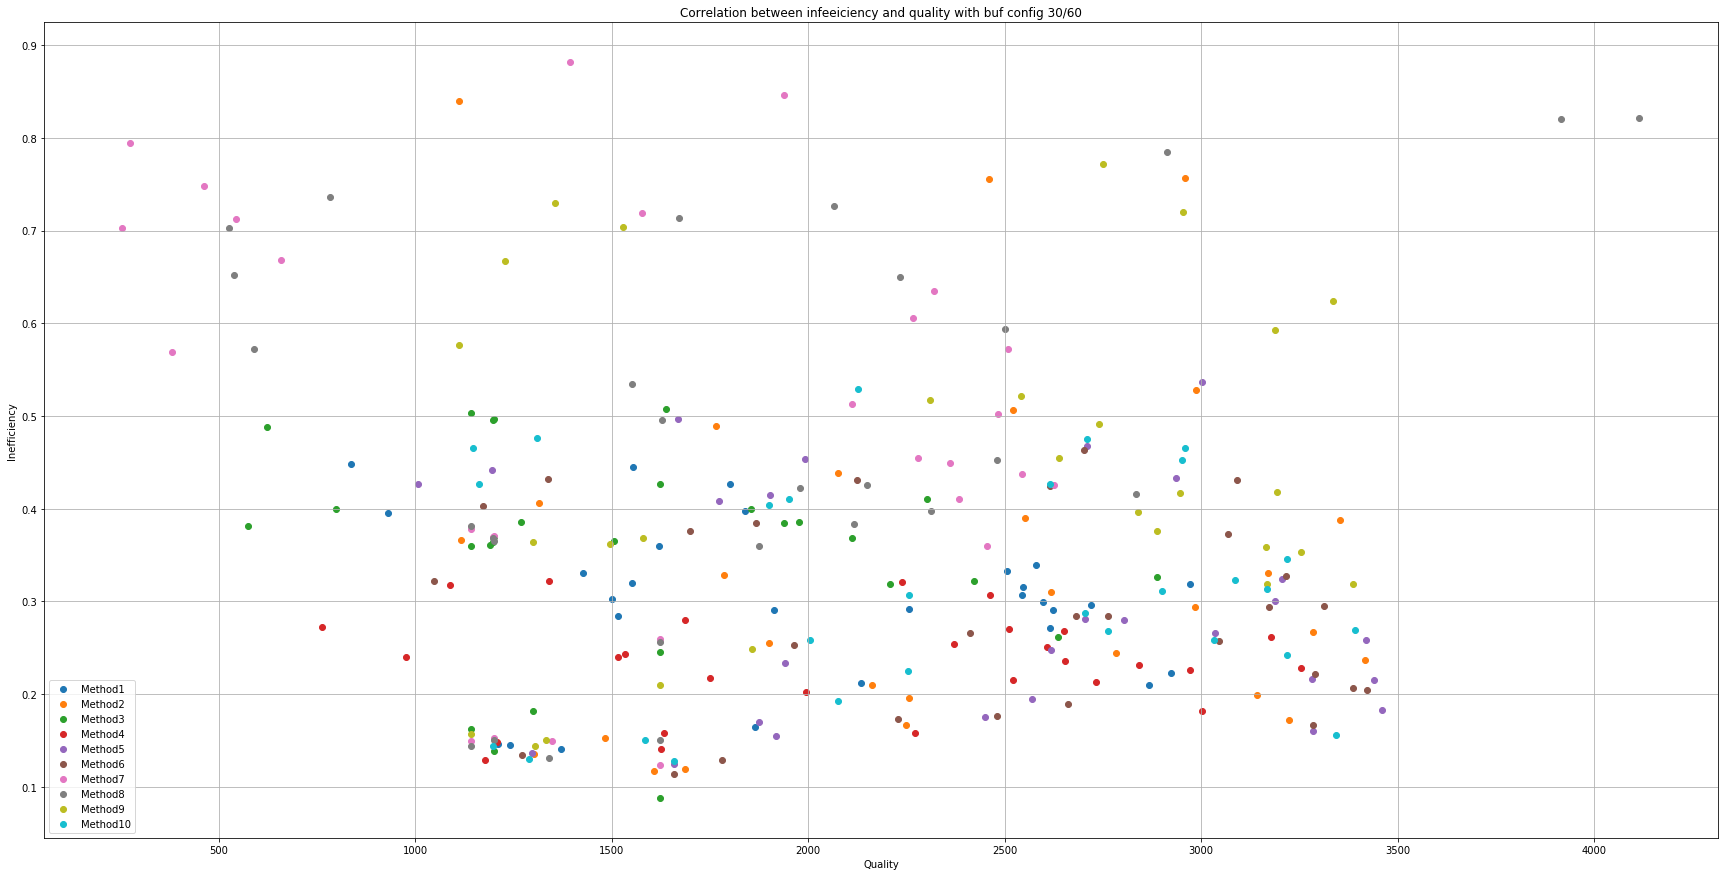

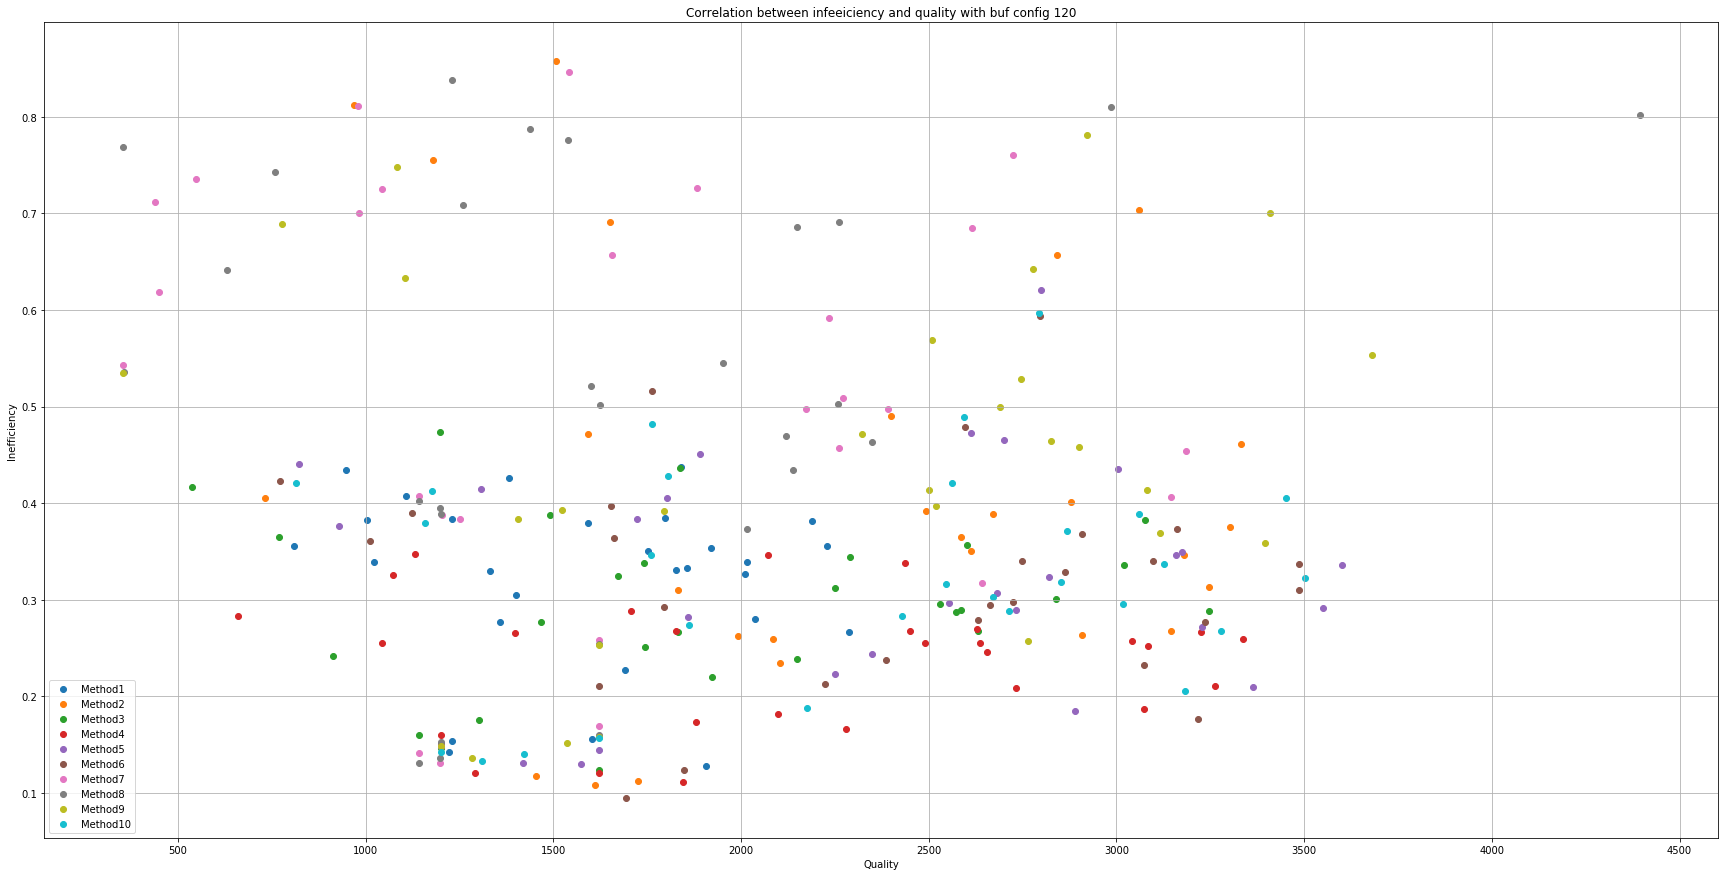

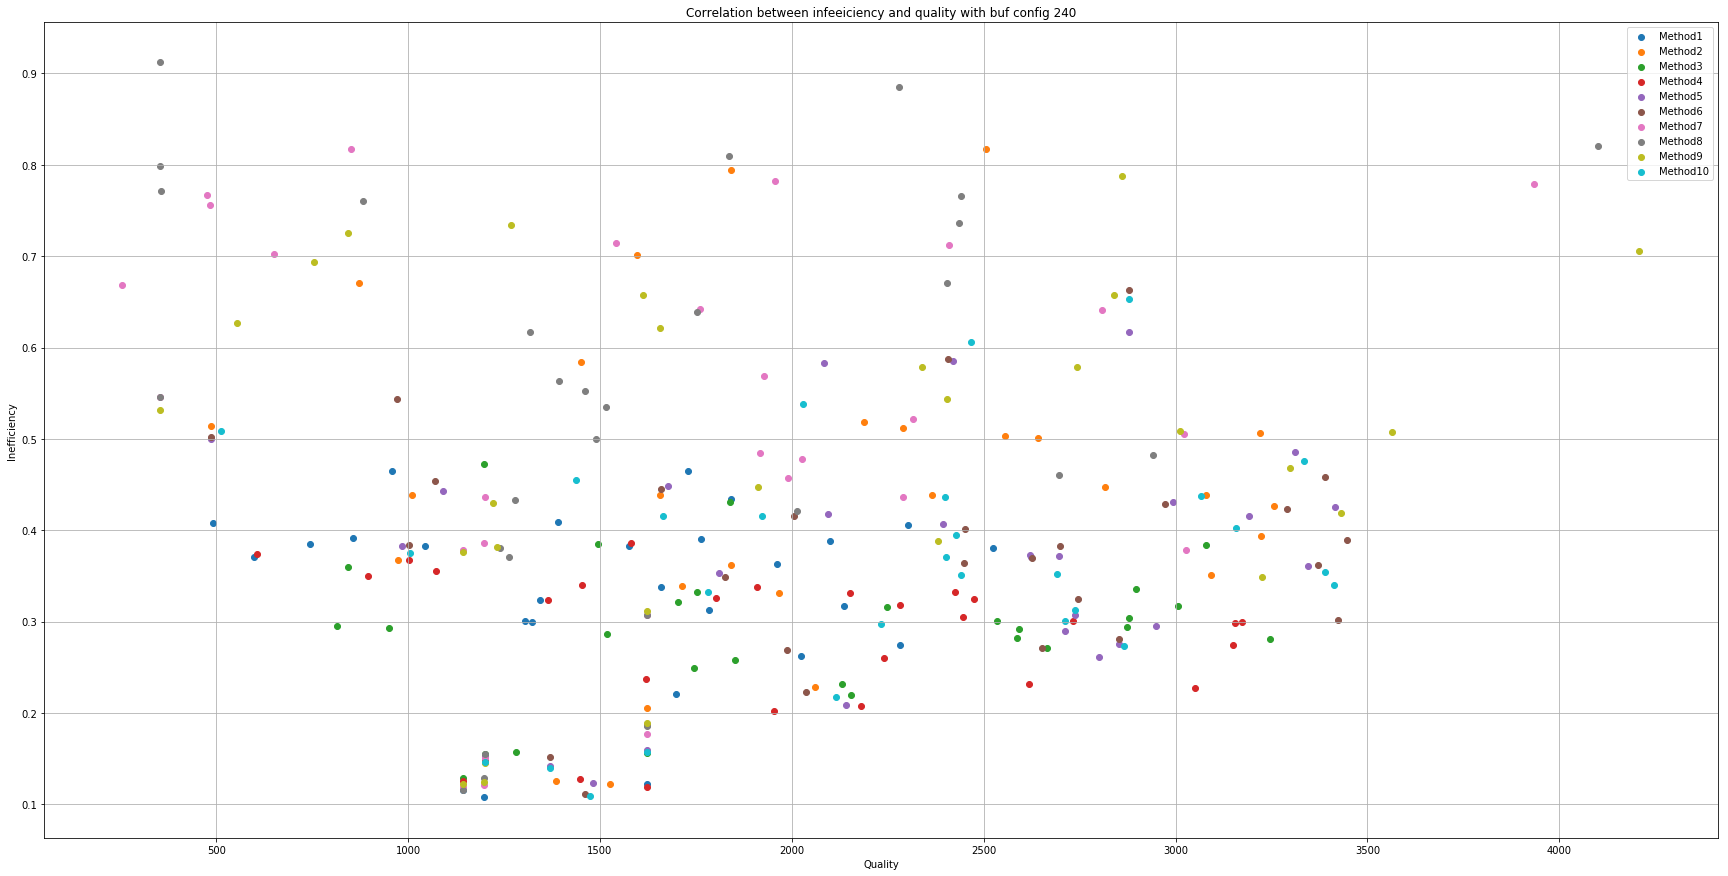

In [63]:
#For Q3

for config in BUFFER_CONFIGS:
    data = results3[results3.bufSize == config]
    results3 = results[['method', 'bufSize', 'quality', 'inefficiency']]
    plt.figure(figsize=(30,15))
    plt.grid()
    plt.xlabel('Quality')
    plt.ylabel('Inefficiency')
    plt.title('Correlation between infeeiciency and quality with buf config '+config)
    for method in METHODS:
        dataByMethod = data[data.method == method]
        marker = 'o'
        if config == '120':
            marker = 'v'
        if config == '240':
            marker = '^'
        
        plt.scatter(dataByMethod.quality, dataByMethod.inefficiency, marker = 'o', label = method)
        plt.legend()

/home/qin_l/.local/lib/python3.5/site-packages/ipykernel_launcher.py:30: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



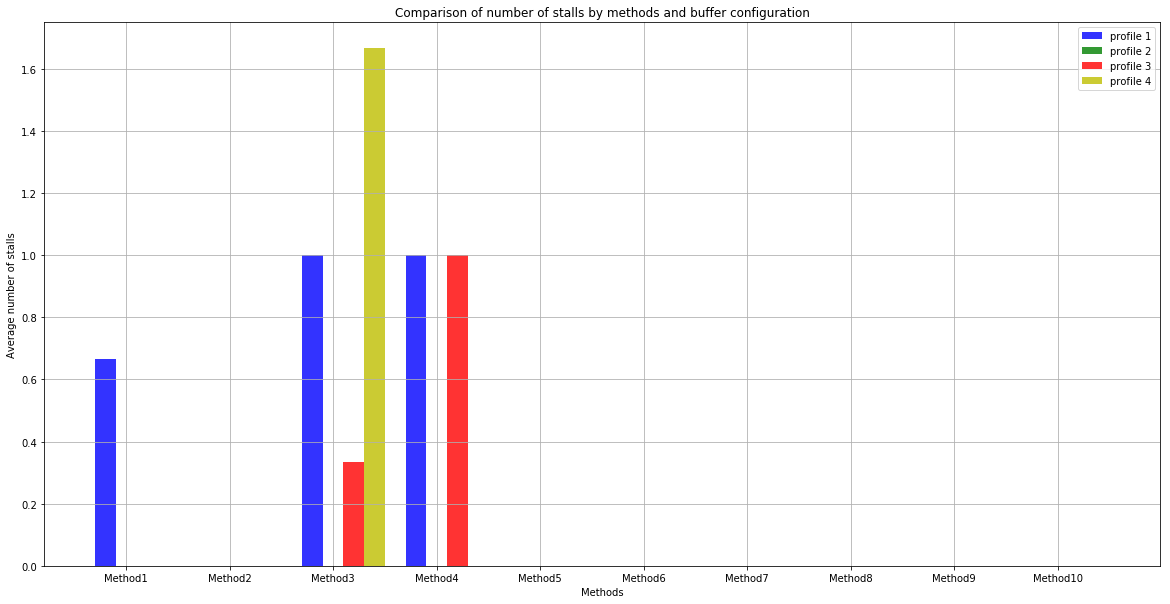

In [71]:
# print (results)
data = results[results['sample'] == 'v7'][['method','profile','numStall']].groupby(['profile', 'method']).mean()
# print(data.get_group('p1'))


# data to plot
n_groups = 10
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8
fig.set_size_inches(20, 10) # set size of the plot
for profile in PROFILES:
    if profile == 'p1':
        label = 'profile 1'
        color = 'b'
        mult = 0
    elif profile == 'p2':
        label = 'profile 2'
        color = 'g'
        mult = 1
    elif profile == 'p3':
        label = 'profile 3'
        color = 'r'
        mult = 2
    else:
        label = 'profile 4'
        color = 'y'
        mult = 3
    data = results[results['sample'] == 'v7'][results['profile'] == profile]
    data = data.groupby(['method'])['numStall'].mean().reindex(METHODS)
    plt.bar(index+bar_width*mult, data.tolist(), bar_width, alpha=opacity, color=color,label=label)
plt.xlabel('Methods')
plt.ylabel('Average number of stalls')
plt.title('Comparison of number of stalls by methods and buffer configuration')
plt.xticks(index + bar_width, METHODS)
plt.legend()
plt.grid()
plt.show()